# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [24]:
import os
import requests 
import tweepy
import pandas as pd 
from dotenv import load_dotenv


# load the .env file variables
load_dotenv()

consumer_key = os.getenv("CONSUMER_KEY")
consumer_secret = os.getenv("CONSUMER_SECRET")
bearer_token= os.getenv("BEARER_TOKEN")



# Creando cliente de Twitter

client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret,
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

# Definiendo el query para Tweeter

query = '#100daysofcode (pandas OR python) -is:retweet'  
#query = '#Java  -is:retweet'    

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

In [25]:
tweets

<Response [200]>

In [26]:
tweets_dict = tweets.json() 

In [27]:
list(tweets_dict)

['data', 'meta']

In [28]:
tweets_data = tweets_dict['data'] 
df = pd.json_normalize(tweets_data)
df

,id,author_id,text,created_at,lang
0,1544010328006090752,1393226889372835851,Pay us to do or write your \n#Assignments \n#c...,2022-07-04T17:28:43.000Z,en
1,1544009854880194560,921765201191596032,Intermediate Python Programming Course | https...,2022-07-04T17:26:50.000Z,fr
2,1544009804410228736,4263007693,Assorted Neural Style. #BigData #Analytics #Da...,2022-07-04T17:26:38.000Z,en
3,1544009296329187328,3303086797,Day 54 of #100DaysOfCode \nLearned about pytho...,2022-07-04T17:24:37.000Z,en
4,1544009082444869632,1242871423867047936,Day-26/100\nStarted learning ML Algorithms. \n...,2022-07-04T17:23:46.000Z,en
...,...,...,...,...,...
95,1544000605336870913,1528856711725031425,#programming #100daysofcode #python3 #coding #...,2022-07-04T16:50:05.000Z,en
96,1544000584818143232,1332714745871421443,NEED a #JOB?\nSign up now https://t.co/o7lVlsC...,2022-07-04T16:50:00.000Z,en
97,1544000578086486017,1500562744919171073,What is a Bare Metal Server?\n\n#artificialint...,2022-07-04T16:49:58.000Z,en
98,1544000545471746049,1094022475736903687,"If You Are an MIS Student, then you need this ...",2022-07-04T16:49:50.000Z,en


In [29]:
tweets_data

[{'id': '1544010328006090752',
  'author_id': '1393226889372835851',
  'text': 'Pay us to do or write your \n#Assignments \n#calculus \n#homework\n#Homeworkhelp \n#Onlineclass \n#essayhelp \n#Essaydue \n#essaywrite \n#Essays\n#Music\n#Art\n#Law \n#Javascript\n#Python\n#Programming\n#CodeNewbies \n#100daysofcode\n#webdevelopment \n#Datascience\nDm us now for help',
  'created_at': '2022-07-04T17:28:43.000Z',
  'lang': 'en'},
 {'id': '1544009854880194560',
  'author_id': '921765201191596032',
  'text': 'Intermediate Python Programming Course | https://t.co/WGFhecc1rX \nhttps://t.co/fBEF9eHFlt \n\n#100DaysOfCode #301DaysOfCode',
  'created_at': '2022-07-04T17:26:50.000Z',
  'lang': 'fr'},
 {'id': '1544009804410228736',
  'author_id': '4263007693',
  'text': 'Assorted Neural Style. #BigData #Analytics #DataScience #AI #MachineLearning #IoT #IIoT #PyTorch #Python #RStats #TensorFlow #Java #JavaScript #ReactJS #GoLang #CloudComputing #Serverless #DataScientist #Linux #Programming #Coding #10

In [30]:
list(tweets_data[0])

['id', 'author_id', 'text', 'created_at', 'lang']

In [31]:
# Guardar el df en un archivo tipo csv
df.to_csv('../assets/coding-tweets.csv')



In [33]:
# la libreria re corresponde a las expresiones regulares en python
#import re
import re

# crear la funcion para contar los tweets que contienen las palabras pandas y python
# Aca definimos la funcion

def palabra_en_tweet(pal,twt):
    ret = 0
    pal = pal.lower()
    twt= twt.lower()
    esta = re.search(pal,twt)
    if esta:
        ret=1
    return ret
             



In [34]:
# Inicializamos unas listas para contar las palabras encontradas en los  tweets
# iterrows sirve para iterar sobre filas en pandas

[pan, pyt] = [0 , 0]

# Vamos a iterar el en dataframe para saber si las palabras buscadas estan en los tweets que leimos

for indice,fila in df.iterrows():
    pan += palabra_en_tweet('pandas', fila['text'])
    pyt += palabra_en_tweet('python', fila['text'])

print(pan)
print(pyt)    

0
100


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


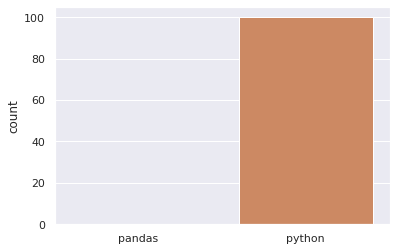

In [35]:
# Visualizar los datos
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes=True)

# Lista de las eqiquetas para colocar
cab = ['pandas','python']

varx = sns.barplot(cab,[pan,pyt])
varx.set(ylabel='count')
plt.show()

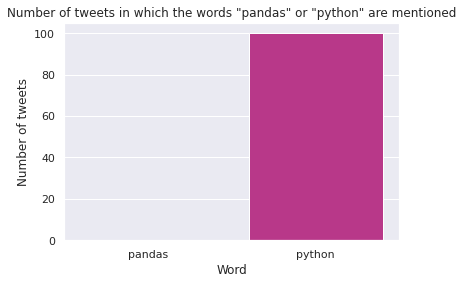

In [45]:

counts_by_word = pd.DataFrame({"Word":cab, "Counts":[pan,pyt]})
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x="Word", y="Counts", data=counts_by_word, palette="RdPu")
plt.xlabel("Word")
plt.ylabel("Number of tweets")
plt.title('Number of tweets in which the words "pandas" or "python" are mentioned')
fig = sns_plot.get_figure()